In [15]:
import pandas as pd

#0=54 V, 1=54.5 V, 2=55 V, 3=55.5 V, 4=56 V, 5=56.5 V, 6=57 V

hl = 1
        
df = pd.read_csv('adj54.5v.CSV', sep=';')
masks = pd.read_csv('masks.csv', delimiter=';')

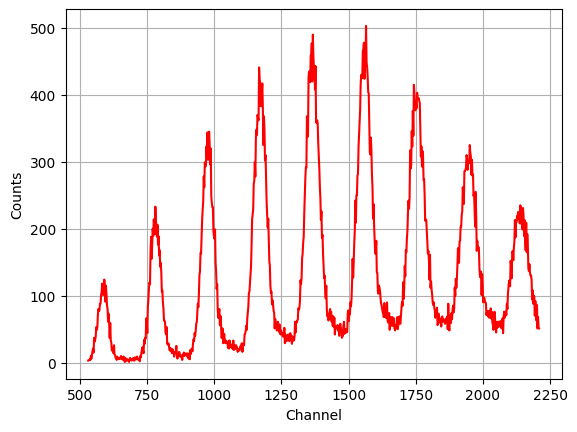

In [16]:
import matplotlib.pyplot as plt
import numpy as np

#plot the histogram
fig, ax = plt.subplots()
ax.plot(df['Channel'], df['Counts'], 'r-')
ax.set_xlabel('Channel')
ax.set_ylabel('Counts')
ax.grid()
plt.show()

In [17]:
yerr = np.sqrt(df['Counts'])

In [18]:
from iminuit import Minuit
from iminuit.cost import LeastSquares
from scipy.stats import norm

def func(x, mu1, sigma1, A1, mu2, sigma2, A2, mu3, sigma3, A3, mu4, sigma4, A4, mu5, sigma5, A5, mu6, sigma6, A6, mu7, sigma7, A7, mu8, sigma8, A8, mu9, sigma9, A9, muB, sigmaB, B):
    return A1 * norm.pdf(x, mu1, sigma1) + A2 * norm.pdf(x, mu2, sigma2) + A3 * norm.pdf(x, mu3, sigma3) + A4 * norm.pdf(x, mu4, sigma4) + A5 * norm.pdf(x, mu5, sigma5) + A6 * norm.pdf(x, mu6, sigma6) + A7 * norm.pdf(x, mu7, sigma7) + A8 * norm.pdf(x, mu8, sigma8) + A9 * norm.pdf(x, mu9, sigma9) + B * norm.pdf(x, muB, sigmaB)

ls = LeastSquares(df['Channel'], df['Counts'], yerr, func)
m = Minuit(ls, mu1=masks['Media1'][hl], sigma1=20, A1=masks['A1'][hl], mu2=masks['Media2'][hl], sigma2=20, A2=masks['A2'][hl], mu3=masks['Media3'][hl], sigma3=20, A3=masks['A3'][hl], mu4=masks['Media4'][hl], sigma4=20, A4=masks['A4'][hl], mu5=masks['Media5'][hl], sigma5=20, A5=masks['A5'][hl], mu6=masks['Media6'][hl], sigma6=20, A6=masks['A6'][hl], mu7=masks['Media7'][hl], sigma7=20, A7=masks['A7'][hl], mu8=masks['Media8'][hl], sigma8=20, A8=masks['A8'][hl], mu9=masks['Media9'][hl], sigma9=20, A9=masks['A9'][hl], muB=masks['MediaB'][hl], sigmaB=600, B=masks['AB'][hl])
m.values['A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'B'] = 0
m.fixed['mu2', 'sigma2', 'A2', 'mu3', 'sigma3', 'A3', 'mu4', 'sigma4', 'A4', 'mu5', 'sigma5', 'A5', 'mu6', 'sigma6', 'A6', 'mu7', 'sigma7', 'A7', 'mu8', 'sigma8', 'A8', 'mu9', 'sigma9', 'A9', 'muB', 'sigmaB', 'B'] = True
ls.mask = (df['Channel'] > masks['Left1'][hl]) & (df['Channel'] < masks['Right1'][hl])
m.migrad()
m.hesse()

ls.mask = None
m.fixed = False
ls.mask = (df['Channel'] > masks['Left2'][hl]) & (df['Channel'] < masks['Right2'][hl])
m.values['A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'B'] = 0
m.fixed['mu1', 'sigma1', 'A1', 'mu3', 'sigma3', 'A3', 'mu4', 'sigma4', 'A4', 'mu5', 'sigma5', 'A5', 'mu6', 'sigma6', 'A6', 'mu7', 'sigma7', 'A7', 'mu8', 'sigma8', 'A8', 'mu9', 'sigma9', 'A9', 'muB', 'sigmaB', 'B'] = True
m.migrad()
m.hesse()

ls.mask = None
m.fixed = False
ls.mask = (df['Channel'] > masks['Left3'][hl]) & (df['Channel'] < masks['Right3'][hl])
m.values['A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'B'] = 0
m.fixed['mu1', 'sigma1', 'A1', 'mu2', 'sigma2', 'A2', 'mu4', 'sigma4', 'A4', 'mu5', 'sigma5', 'A5', 'mu6', 'sigma6', 'A6', 'mu7', 'sigma7', 'A7', 'mu8', 'sigma8', 'A8', 'mu9', 'sigma9', 'A9', 'muB', 'sigmaB', 'B'] = True
m.migrad()
m.hesse()

ls.mask = None
m.fixed = False
ls.mask = (df['Channel'] > masks['Left4'][hl]) & (df['Channel'] < masks['Right4'][hl])
m.values['A5', 'A6', 'A7', 'A8', 'A9', 'B'] = 0
m.fixed['mu1', 'sigma1', 'A1', 'mu2', 'sigma2', 'A2', 'mu3', 'sigma3', 'A3', 'mu5', 'sigma5', 'A5', 'mu6', 'sigma6', 'A6', 'mu7', 'sigma7', 'A7', 'mu8', 'sigma8', 'A8', 'mu9', 'sigma9', 'A9', 'muB', 'sigmaB', 'B'] = True
m.migrad()
m.hesse()

ls.mask = None
m.fixed = False
ls.mask = (df['Channel'] > masks['Left5'][hl]) & (df['Channel'] < masks['Right5'][hl])
m.values['A6', 'A7', 'A8', 'A9', 'B'] = 0
m.fixed['mu1', 'sigma1', 'A1', 'mu2', 'sigma2', 'A2', 'mu3', 'sigma3', 'A3', 'mu4', 'sigma4', 'A4', 'mu6', 'sigma6', 'A6', 'mu7', 'sigma7', 'A7', 'mu8', 'sigma8', 'A8', 'mu9', 'sigma9', 'A9', 'muB', 'sigmaB', 'B'] = True
m.migrad()
m.hesse()

ls.mask = None
m.fixed = False
ls.mask = (df['Channel'] > masks['Left6'][hl]) & (df['Channel'] < masks['Right6'][hl])
m.values['A7', 'A8', 'A9', 'B'] = 0
m.fixed['mu1', 'sigma1', 'A1', 'mu2', 'sigma2', 'A2', 'mu3', 'sigma3', 'A3', 'mu4', 'sigma4', 'A4', 'mu5', 'sigma5', 'A5', 'mu7', 'sigma7', 'A7', 'mu8', 'sigma8', 'A8', 'mu9', 'sigma9', 'A9', 'muB', 'sigmaB', 'B'] = True
m.migrad()
m.hesse()

ls.mask = None
m.fixed = False
ls.mask = (df['Channel'] > masks['Left7'][hl]) & (df['Channel'] < masks['Right7'][hl])
m.values['A8', 'A9', 'B'] = 0
m.fixed['mu1', 'sigma1', 'A1', 'mu2', 'sigma2', 'A2', 'mu3', 'sigma3', 'A3', 'mu4', 'sigma4', 'A4', 'mu5', 'sigma5', 'A5', 'mu6', 'sigma6', 'A6', 'mu8', 'sigma8', 'A8', 'mu9', 'sigma9', 'A9', 'muB', 'sigmaB', 'B'] = True
m.migrad()
m.hesse()

ls.mask = None
m.fixed = False
ls.mask = (df['Channel'] > masks['Left8'][hl]) & (df['Channel'] < masks['Right8'][hl])
m.values['A9', 'B'] = 0
m.fixed['mu1', 'sigma1', 'A1', 'mu2', 'sigma2', 'A2', 'mu3', 'sigma3', 'A3', 'mu4', 'sigma4', 'A4', 'mu5', 'sigma5', 'A5', 'mu6', 'sigma6', 'A6', 'mu7', 'sigma7', 'A7', 'mu9', 'sigma9', 'A9', 'muB', 'sigmaB', 'B'] = True
m.migrad()
m.hesse()

ls.mask = None
m.fixed = False
ls.mask = (df['Channel'] > masks['Left9'][hl]) & (df['Channel'] < masks['Right9'][hl])
m.values['B'] = 0
m.fixed['mu1', 'sigma1', 'A1', 'mu2', 'sigma2', 'A2', 'mu3', 'sigma3', 'A3', 'mu4', 'sigma4', 'A4', 'mu5', 'sigma5', 'A5', 'mu6', 'sigma6', 'A6', 'mu7', 'sigma7', 'A7', 'mu8', 'sigma8', 'A8', 'muB', 'sigmaB', 'B'] = True
m.migrad()
m.hesse()


ls.mask = None
m.fixed = False
ls.mask = (df['Channel'] > 1000)
m.fixed['mu1', 'sigma1', 'A1', 'mu2', 'sigma2', 'A2', 'mu3', 'sigma3', 'A3', 'mu4', 'sigma4', 'A4', 'mu5', 'sigma5', 'A5', 'mu6', 'sigma6', 'A6', 'mu7', 'sigma7', 'A7', 'mu8', 'sigma8', 'A8', 'mu9', 'sigma9', 'A9'] = True
m.migrad()
m.hesse()


ls.mask = None
m.fixed = False
m.migrad()
m.hesse()
display(m)
print(m.values)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1123 (χ²/ndof = 1.4)       │             Nfcn = 3367              │
│ EDM = 7.86e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu1    │   586.5   │    0.4    │            │            │         │         │       │
│ 1 │ sigma1 │   18.59   │   0.32    │            │            │         │         │       │
│ 2 │ A1     │  5.09e3   │  0.11e3   │            │            │         │         │       │
│ 3 │ mu2    │  782.32   │   0.32    │            │            │         │         │       │
│ 4 │ sigma2 │   20.24   │   0.26    │            │            │         │         │       │
│ 5 │ A2     │  10.40e3  │  0.15e3   │            │            │         │         │       │
│ 6 │ mu3    │  976.62   │   0.27    │            │            │         │         │       │
│ 7 │ sigma3 │   22.09   │   0.23    │            │            │         │         │       │
│ 8 │ A3     │  16.98e3  │  0.20e3   │            │            │         │         │       │
│ 9 │ mu4    │ 1.17136e3 │ 0.00026e3 │            │            │         │         │       │
│ 10│ sigma4 │   23.16   │   0.23    │            │            │         │         │       │
│ 11│ A4     │  22.07e3  │  0.24e3   │            │            │         │         │       │
│ 12│ mu5    │ 1.36611e3 │ 0.00026e3 │            │            │         │         │       │
│ 13│ sigma5 │   24.13   │   0.24    │            │            │         │         │       │
│ 14│ A5     │  25.19e3  │  0.27e3   │            │            │         │         │       │
│ 15│ mu6    │ 1.56020e3 │ 0.00028e3 │            │            │         │         │       │
│ 16│ sigma6 │   24.65   │   0.26    │            │            │         │         │       │
│ 17│ A6     │  25.12e3  │  0.28e3   │            │            │         │         │       │
│ 18│ mu7    │ 1.75491e3 │ 0.00033e3 │            │            │         │         │       │
│ 19│ sigma7 │   25.72   │   0.30    │            │            │         │         │       │
│ 20│ A7     │  21.94e3  │  0.28e3   │            │            │         │         │       │
│ 21│ mu8    │ 1.9480e3  │ 0.0004e3  │            │            │         │         │       │
│ 22│ sigma8 │   27.7    │    0.5    │            │            │         │         │       │
│ 23│ A8     │  17.24e3  │  0.29e3   │            │            │         │         │       │
│ 24│ mu9    │ 2.1407e3  │ 0.0005e3  │            │            │         │         │       │
│ 25│ sigma9 │   29.3    │    0.6    │            │            │         │         │       │
│ 26│ A9     │  13.02e3  │  0.33e3   │            │            │         │         │       │
│ 27│ muB    │  1.787e3  │  0.015e3  │            │            │         │         │       │
│ 28│ sigmaB │    478    │     9     │            │            │         │         │       │
│ 29│ B      │  74.9e3   │   1.7e3   │            │            │         │         │       │
└───┴────────┴─────

<ValueView mu1=586.5198099084046 sigma1=18.58609012945946 A1=5088.805463691341 mu2=782.3164800174344 sigma2=20.243266953729005 A2=10396.276732614419 mu3=976.6226912758384 sigma3=22.089164691344124 A3=16980.93410459623 mu4=1171.3554877998135 sigma4=23.158341585203654 A4=22070.87118678152 mu5=1366.1106282093372 sigma5=24.1287294217384 A5=25193.15329854871 mu6=1560.2034651933855 sigma6=24.654500570638255 A6=25116.8383939106 mu7=1754.9094492451543 sigma7=25.722578417309894 A7=21942.37385722833 mu8=1947.9921196225405 sigma8=27.656213559027236 A8=17241.42874156334 mu9=2140.6637528187407 sigma9=29.277932634753785 A9=13016.871616477447 muB=1786.5464792411078 sigmaB=478.3687513463276 B=74894.13492908637>


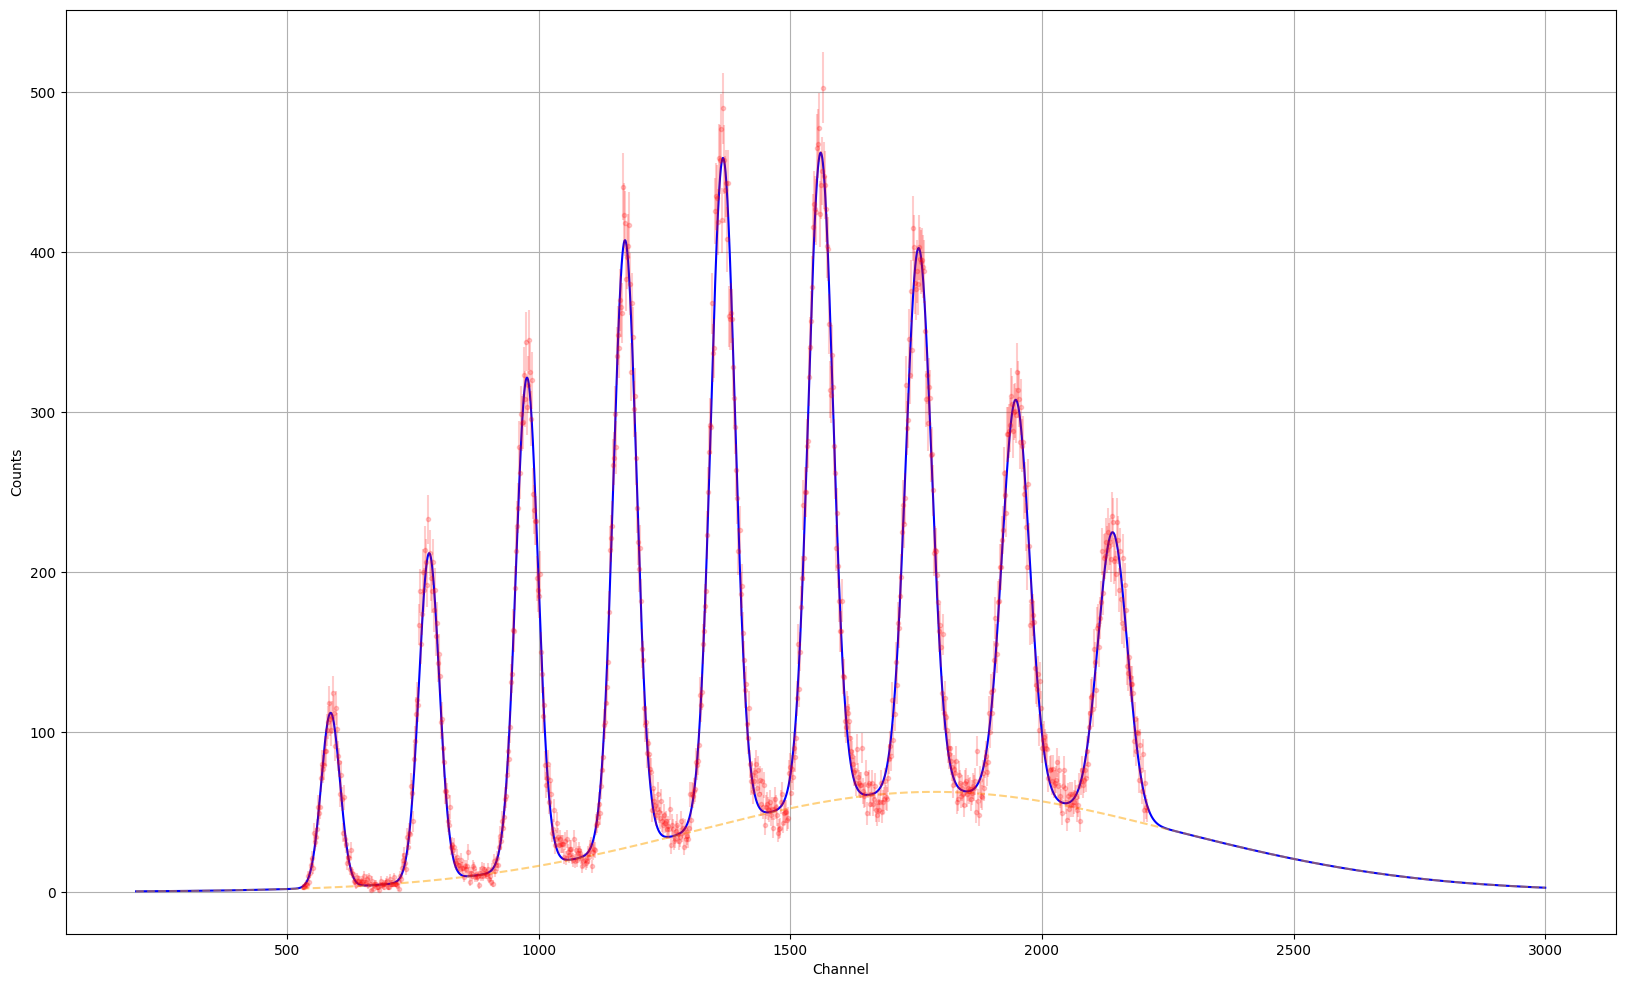

In [19]:
#plotta la funzione
fig, ax = plt.subplots()
fig.set_size_inches(20, 12)
x = np.linspace(200, 3000, 10000)
y = func(x, *m.values)
ax.plot(x, y, 'b-')
ax.plot(x, norm.pdf(x, m.values['muB'], m.values['sigmaB'])*m.values['B'], color='orange', linestyle='--', alpha=0.5)
ax.errorbar(df['Channel'], df['Counts'], yerr, fmt='r.', alpha=0.2)
ax.set_xlabel('Channel')
ax.set_ylabel('Counts')
ax.grid()
plt.show()

In [20]:
list_deltachannel = np.array([m.values['mu2']-m.values['mu1'], m.values['mu3']-m.values['mu2']]) #complete
list_deltachannel = np.append(list_deltachannel, [m.values['mu4']-m.values['mu3'], m.values['mu5']-m.values['mu4'], m.values['mu6']-m.values['mu5'], m.values['mu7']-m.values['mu6'], m.values['mu8']-m.values['mu7'], m.values['mu9']-m.values['mu8']])

correction_factor = (2*(4*10**(-9)))/(50*(2**12)*32)

gain = np.mean(list_deltachannel)*correction_factor/(1.602*10**(-19))
gain_err = np.std(list_deltachannel)/np.sqrt(len(list_deltachannel))*correction_factor/(1.602*10**(-19))

print('gain =', gain, '+/-', gain_err)
print('convADC =', np.mean(list_deltachannel), '+/-', np.std(list_deltachannel)/np.sqrt(len(list_deltachannel)))

gain = 1480296.7913627254 +/- 2514.1852481602587
convADC = 194.26799286379202 +/- 0.32995121295791996


In [22]:
from jax import grad, jacfwd
import jax.numpy as np

def error_prop_jax_gen(q,x,dx):
    jac = jacfwd(q)
    return np.sqrt(np.sum(np.power(jac(x)*dx,2)))

def resolution_function(x):
    return (x[2]-x[0])/np.sqrt(x[3]**2-x[1]**2)

x_=np.array([m.values['mu2'], m.values['sigma2'], m.values['mu3'], m.values['sigma3']])
dx_=np.array([m.errors['mu2'], m.errors['sigma2'], m.errors['mu3'], m.errors['sigma3']])

print('resolution =', resolution_function(x_), '+/-', error_prop_jax_gen(resolution_function, x_, dx_))

resolution = 21.980938 +/- 2.0725162


In [23]:
print(m.values['mu3'], m.errors['mu3'])

976.6226912758384 0.27335089321515144
